In [1]:
import os 

map_raster = '/home/prambaud/gfc_wrapper_results/gfc/PU_20_merged_gfc_map.tif'
    
if not os.path.isfile(map_raster): 
    print('No gfc map')

In [7]:
import rasterio as rio
import numpy as np

with rio.open(map_raster) as src:
    info = src.read(1, masked=True)

print(info.shape)
print(info.ravel().shape)

array = np.array(info.ravel())
codes, frequency = np.unique(array, return_counts=True)
print(codes)
print(frequency)

(6553, 11462)
(75110486,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 30 40 50 51]
[36623086    30061    68692    12088    48461    48178    26703    81788
    41264   105748    63303    57529    54681   347155   181793   193502
   247564   252609   217514   249516 19408586 16677087    49795    23783]


In [14]:
import pandas as pd 

columns = ['codes', 'pixels']
hist = pd.DataFrame([[codes[i], frequency[i]] for i in range(len(codes))], columns=columns)
hist = hist[(hist['codes'] > 0) & (hist['codes']< 30)]
hist

,codes,pixels
1,1,30061
2,2,68692
3,3,12088
4,4,48461
5,5,48178
6,6,26703
7,7,81788
8,8,41264
9,9,105748
10,10,63303


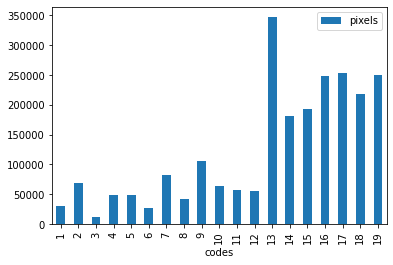

In [15]:
import matplotlib.pyplot as plt

hist.plot(x ='codes', y='pixels', kind = 'bar')
plt.show()

In [ ]:
from utils import utils

#realize a primary hist
hist = utils.pixelCount(map_raster)

hist

In [ ]:
from utils import utils
    
    #realize a primary hist
    hist = utils.pixelCount(map_raster)
    
    src = gdal.Open(map_raster)
    proj = osr.SpatialReference(wkt=src.GetProjection())
    bb = utils.get_bounding_box(assetId)
    _, resx, _, _, _, resy  = src.GetGeoTransform()
    src = None
    
    #the prjection is not equal-area. Approximation of the pixel surface is done with the followings : 1° = 111 km
    
    resx_proj = resx * 111321
    resy_proj = resy * 111321
    
    #convert to hectars
    hist['area'] = utils.toHectar(hist['pixels'], resx_proj, resy_proj)
    
    #drop 0 ha lines and croped values (255)
    #hist = hist[(hist['area'] != 0) & (hist['code'] != 255)]
    
    #add line indexes 
    hist['class'] = pm.getMyLabel()
    
    return hist